In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Examining Linear Relationship

In [71]:
X = np.random.rand(100).reshape(-1,1) #100 random numbers between 0 and 1
Y = X**2 + np.random.normal(0,0.07,100).reshape(-1,1)

Mean Squared Error is 0.010242099241071279


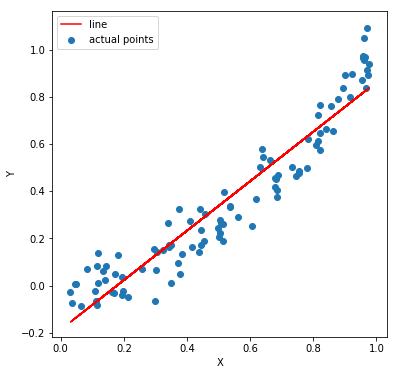

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression().fit(X,Y)
Y_pred = model.predict(X)
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['line', 'actual points'])
print("Mean Squared Error is", mean_squared_error(Y,Y_pred))

Mean Squared Error is 0.0053138865189694675


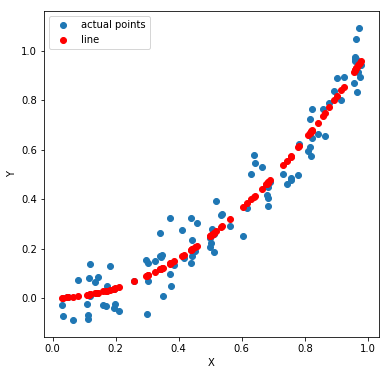

In [73]:
from sklearn.linear_model import LinearRegression
X_transformed = X**2
model = LinearRegression().fit(X_transformed,Y)
Y_pred = model.predict(X_transformed)
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
plt.scatter(X,Y_pred,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['actual points','line'])
print("Mean Squared Error is", mean_squared_error(Y,Y_pred))

## Homoscedasticity

In [150]:
X = np.array(range(100))*0.005#100 random numbers between 0 and 1
X=X.reshape(-1,1)
multiplier = np.multiply(np.array(range(100))*0.5,np.random.normal(0,0.001,100))
noise = np.random.normal(0,0.01,100)
Y = X+ multiplier.reshape(-1,1)

Mean Squared Error is 0.0007670627814727898


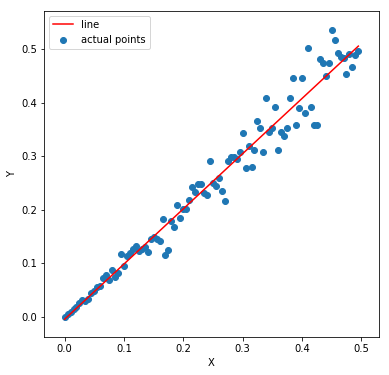

In [151]:
model = LinearRegression().fit(X,Y)
Y_pred = model.predict(X)
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['line', 'actual points'])
print("Mean Squared Error is", mean_squared_error(Y,Y_pred))

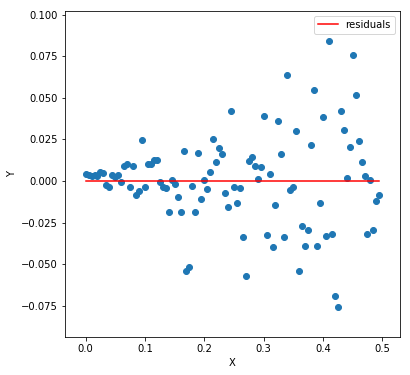

In [152]:
residuals = Y-Y_pred
plt.figure(figsize=(6,6))
plt.scatter(X,residuals)
plt.plot(X,residuals*0, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['residuals'])

Mean Squared Error is 9.84371999368259e-05


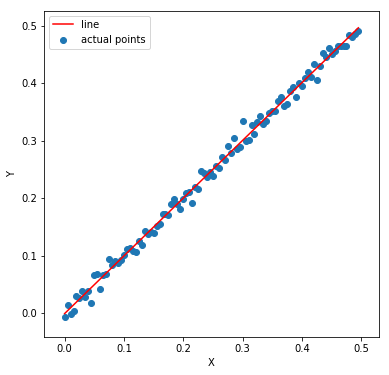

In [153]:
Y=X+noise.reshape(-1,1)
model = LinearRegression().fit(X,Y)
Y_pred = model.predict(X)
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['line', 'actual points'])
print("Mean Squared Error is", mean_squared_error(Y,Y_pred))


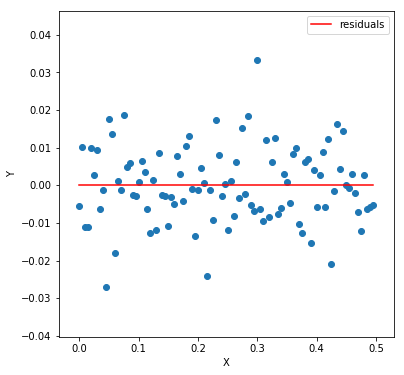

In [154]:
residuals = Y-Y_pred
plt.figure(figsize=(6,6))
plt.scatter(X,residuals)
plt.plot(X,residuals*0, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['residuals'])

## Dependent error terms

In [210]:
X = np.array(range(100))*1#100 random numbers between 0 and 1
X=X.reshape(-1,1)
error = np.random.normal(0,1)
multiplier=[error]
for i in range(99):
    multiplier.append(multiplier[-1]+np.random.normal(0,0.4))
# noise = np.random.normal(0,0.01,100)
Y = X+ np.array(multiplier).reshape(-1,1)

Mean Squared Error is 1.689808768265371
Autocorrelation is :  [[1.         0.94546062]
 [0.94546062 1.        ]]


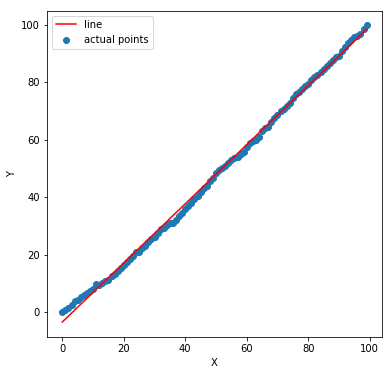

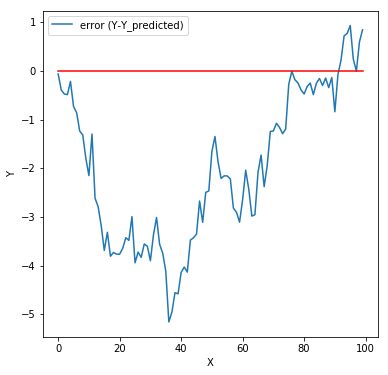

In [215]:
model = LinearRegression().fit(X,Y)
Y_pred = model.predict(X)
plt.figure(figsize=(6,6))
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['line', 'actual points'])
print("Mean Squared Error is", mean_squared_error(Y,Y_pred))
plt.figure(figsize=(6,6))
plt.plot(X,np.array(multiplier).reshape(-1,1))
plt.plot(X,np.zeros(100), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['error (Y-Y_predicted)'])
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))
print("Autocorrelation is : ", autocorr((Y-Y_pred).reshape(-1,)))

In [169]:
multiplier

array([-0.        , -0.00046448, -0.00092895, -0.00139343, -0.00185791,
       -0.00232239, -0.00278686, -0.00325134, -0.00371582, -0.0041803 ,
       -0.00464477, -0.00510925, -0.00557373, -0.00603821, -0.00650268,
       -0.00696716, -0.00743164, -0.00789612, -0.00836059, -0.00882507,
       -0.00928955, -0.00975403, -0.0102185 , -0.01068298, -0.01114746,
       -0.01161194, -0.01207641, -0.01254089, -0.01300537, -0.01346984,
       -0.01393432, -0.0143988 , -0.01486328, -0.01532775, -0.01579223,
       -0.01625671, -0.01672119, -0.01718566, -0.01765014, -0.01811462,
       -0.0185791 , -0.01904357, -0.01950805, -0.01997253, -0.02043701,
       -0.02090148, -0.02136596, -0.02183044, -0.02229492, -0.02275939,
       -0.02322387, -0.02368835, -0.02415282, -0.0246173 , -0.02508178,
       -0.02554626, -0.02601073, -0.02647521, -0.02693969, -0.02740417,
       -0.02786864, -0.02833312, -0.0287976 , -0.02926208, -0.02972655,
       -0.03019103, -0.03065551, -0.03111999, -0.03158446, -0.03